# Mean Squared Error (MSE)
(Note - it is recommended to review Mean Absolute Error first)

In [2]:
from scores.continuous import mae
from scores.continuous import mse

help(mse)

Help on function mse in module scores.continuous:

mse(forecast, observed, reduce_dims=None)
    Returns a single floating point number representing the mean squared
    error for the supplied data. All dimensions will be reduced.
    
    If reduce_dims is specified, the method will use xarray calculate the mean along
    that dimension and preserve remaining dimensions in the return result.
    
    Dimensional reduction is not supported for pandas and the user should
    convert their data to xarray to formulate the call to the metric.



In [3]:
import numpy
import pandas
import xarray

In [4]:
forecast = xarray.open_dataset('forecast_grid.nc')
analysis = xarray.open_dataset('analysis_grid.nc')

# Use MSE to Focus on Anomalies and Don't Sweat the Small Stuff
For many problems, big errors are much worse than small ones. If the temperature is 1 or 2 degrees different, it's hard to notice. If it's 30 degrees different, it's really a whole different situation.

Using Mean Squared Error really focuses the attention on the most significant errors. This can be useful for visual interpretation, and also useful to algorithms which can make a much bigger change in response to outliers. It is slightly more efficient than calculating the square root of the mean squared error by avoiding the square root operation. The downside of using mean squared error is that the result ceases to be a 'representative' error, and is no longer as easily interpretable in terms of its units. To make this clearer, both MAE and RMSE provide a 'reasonable description' of the error you can expect to experience. MSE does not provide this kind of indication.

Here we can see both MAE and MSE plotted adjacent to one another to see the impacts. Mean absolute error varies between 0 and 25 in this example, which is dwarfed by the largest values of mean squared error. This clearly highlights which spatial areas are affected by the most significant changes in the forecast period.

Mean Absolute Error and Mean Squared Error are both minimised when error is minimised. Root Mean Squared Error (RMSE)

In [5]:
# Figure One - Mean Absolute Error of Predictions
mean = mae(forecast.temp_scrn,forecast.temp_scrn[0], reduce_dims='time') 
squared = mse(forecast.temp_scrn,forecast.temp_scrn[0], reduce_dims='time') 

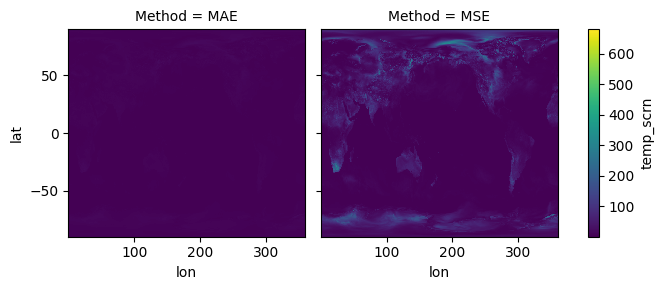

In [6]:
# Figure One - Side by Side Comparison of MAE and MSE
names = pandas.Index(['MAE', 'MSE'], name="Method")
xarray.concat([mean, squared], dim=names).plot(col='Method')

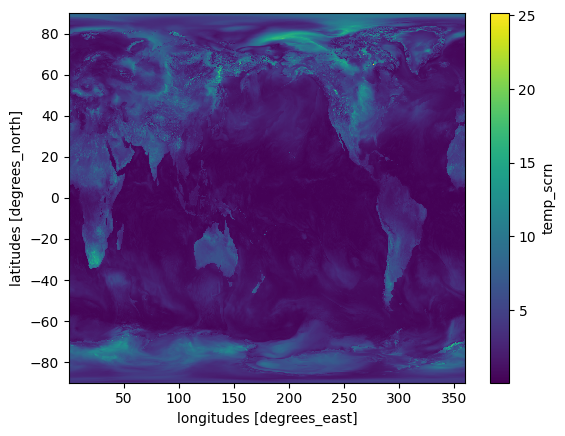

In [8]:
# Figure Two - Mean Absolute Error of Predictions
mae(forecast.temp_scrn,forecast.temp_scrn[0], reduce_dims='time').plot()

# Matching the Forecast Lead Time and to Observations

The details of matching the forecast time step to the observation time step are the same as the tutorial on Mean Absolute Error - please review that notebook for a more detailed overview.

In [9]:
time_step_of_interest = forecast.temp_scrn[24*4-1]

In [10]:
mse(time_step_of_interest, analysis.temp_scrn).values

array(6.105108, dtype=float32)

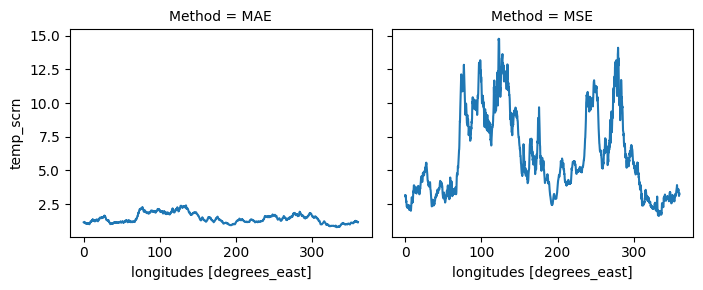

In [11]:
mae_by_longitude = mae(time_step_of_interest, analysis.temp_scrn, reduce_dims='lat')
mse_by_longitude = mse(time_step_of_interest, analysis.temp_scrn, reduce_dims='lat')
xarray.concat([mae_by_longitude, mse_by_longitude], dim=names).plot(col='Method')

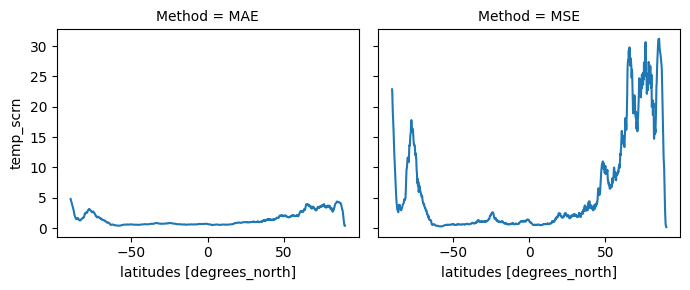

In [12]:
mae_by_latitude = mae(time_step_of_interest, analysis.temp_scrn, reduce_dims='lon')
mse_by_latitude = mse(time_step_of_interest, analysis.temp_scrn, reduce_dims='lon')
xarray.concat([mae_by_latitude, mse_by_latitude], dim=names).plot(col='Method')